# Лабораторная работа №1
### Решение краевых задач методом разностных аппроксимаций

Разобъем отрезок [a,b] на n одинаковых частей с шагом $$ h = {b - a c n} $$
n будем брать разные, чтобы показать, как зависит решение от выбранного числа n. 
У нас уравнение в общем случае:
$$a*y" + (1 + b*x^2)*y = -1 $$   $$  -1 ≤ x ≤ 1 $$ $$ y(-1) = 0, y(1) = 0$$
Заменим *y"* на $$ y_{k+1}-2*y_{k}+y_{k-1} \over h^2 $$
Получаем $$ a*{y_{k+1}-2*y_{k}+y_{k-1} \over h^2} + (1 + b*x^2)*y = -1 $$
$$ k = 1, n - 1 $$
Дальше приведя подобные слогаемые и домножая на $$h^2$$ получаем:
$$ a*y_{k - 1} -(2*a - h^2*(1 + b*x^2))*y_{k} + a*y_{k + 1} = -h^2 $$
Таким образом у нас получилась трехдиагональная система линейных уравнений, которую можно решить методом прогонки или встроенными средствами программ.

Разделим коэффициенты для универсальности на отдельные функции. Пусть при $$ y_{ k - 1 } $$ стоит условно А, при $$y_{k}$$ стоит B, а при $$y_{k+1}$$ стоит C, изначальный коэффициент при y будет p(x)

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import warnings


def p(x, betta):
    return 1 + betta * x**2


def f(x):
    return -1


def A(x, alfa):
    return 1 * alfa


def B(x, h, alfa, betta):
    return -2 * alfa + h*h * p(x, betta)


def C(x, alfa):
    return 1 * alfa


def F(x, h):
    return h*h*f(x)

a = -1
b = 1
n = [5, 10, 50, 100, 500]
k = 26

Теперь составим универсальную функцию для решения поставленной задачи, зависящая только от *alfa* и *betta*

In [7]:
def solve(alfa, betta):
    for i in n:
        h = (b - a) / i
        x = a + h
        x_k = []
        y = []
        y.append(0)
        x_k.append(a)
        matrix = []
        for j in range(1, i):
            row = []
            for k in range(1, i):
                if (k == j - 1):
                    row.append(A(x, alfa(x)))
                elif (k == j):
                    row.append(B(x, h, alfa(x), betta(x)))
                elif (k == j + 1):
                    row.append(C(x, alfa(x)))
                else:
                    row.append(0)
            matrix.append(row)
            x_k.append(x)
            x += h
        x_k.append(x)
        x = a
        ans_vect = []
        x += h
        for j in range( i - 1):
            ans_vect.append(F(x, h))
            x += h
        y_t = np.linalg.solve(matrix, ans_vect)
        for j in y_t:
            y.append(j)
        y.append(0)
        plt.plot(x_k, y, marker='o')
        plt.show()
    #plt.show()

Теперь можно посчитать результаты для конкретных уравнений:

### Задание 1.
Решить уравнение $$y" + (1 + x^2)*y = -1 $$ 
Т.е. *alfa = 1* и *betta = 1*
Вызовем нашу универсальную функцию:

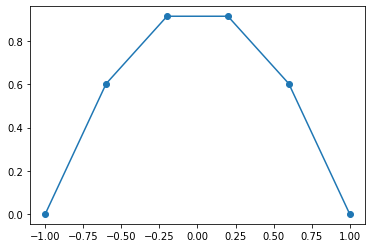

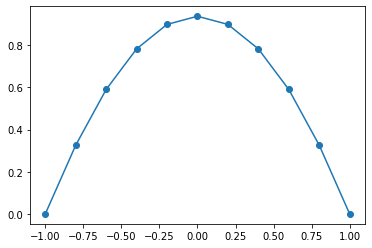

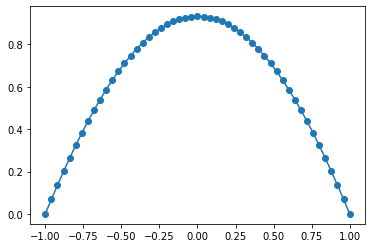

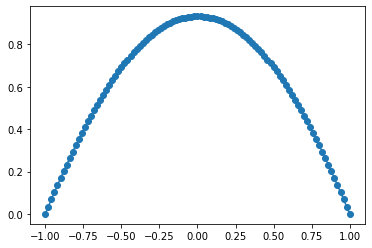

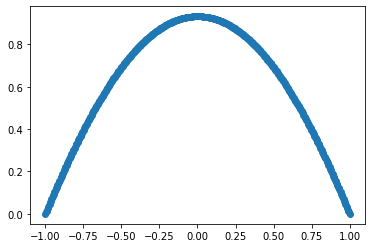

In [6]:
solve(lambda x: 1, lambda x: 1)

### Задание 2.
Решить уравнение $$a*y" + (1 + b*x^2)*y = -1 $$ 
Т.е. *alfa = sin(k)* и *betta = cos(k)*, где k - номер варианта.

Вызовем нашу универсальную функцию:

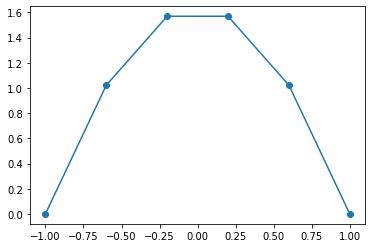

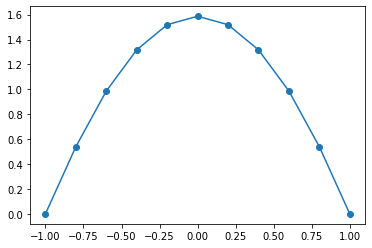

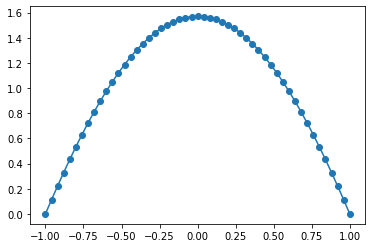

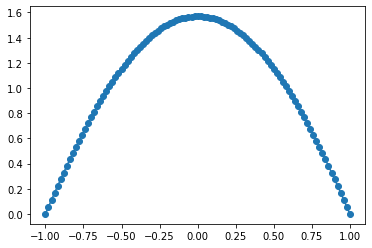

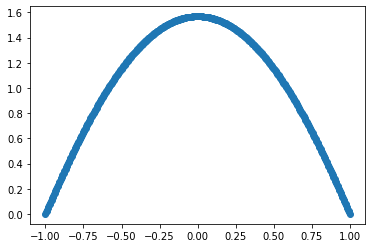

In [5]:
solve(lambda x: np.sin(k), lambda x: np.cos(k))

### Задание 3.
Решить уравнение $$a*y" + (1 + b*x^2)*y = -1 $$ 
Т.е. *alfa = sin(k*x)* и *betta = cos(k*x)*, где k - номер варианта.

Вызовем нашу универсальную функцию:

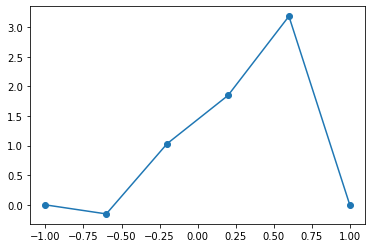

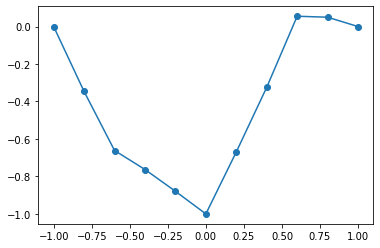

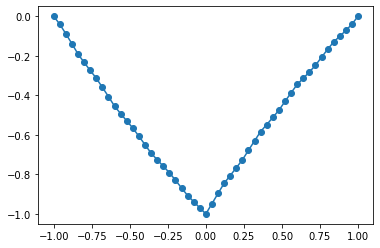

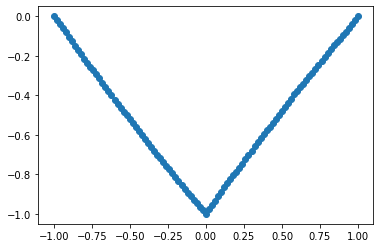

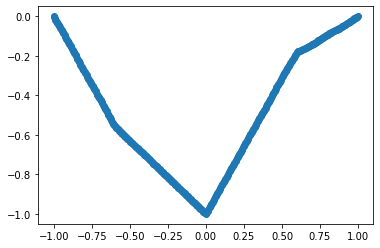

In [4]:
solve(lambda x: np.sin(x*k), lambda x: np.cos(k*x))